# EDA

## Importações

In [1]:
import string
letters = list(string.ascii_lowercase)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

## Leitura dos dados pré-processados

In [2]:
df = pd.read_csv('../data/arquivo_preprocessado.csv')

In [3]:
df.shape

(299999, 37)

In [4]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,travelDurationInSeconds,taxesFare,segment1AirlineName,segment2AirlineName,segment3AirlineName,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,8940.0,30.93,Delta,NaN,NaN,NaN,coach,NaN,NaN,NaN
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,9000.0,30.93,Delta,NaN,NaN,NaN,coach,NaN,NaN,NaN
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,9000.0,30.93,Delta,NaN,NaN,NaN,coach,NaN,NaN,NaN
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,9120.0,30.93,Delta,NaN,NaN,NaN,coach,NaN,NaN,NaN
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,9240.0,30.93,Delta,NaN,NaN,NaN,coach,NaN,NaN,NaN


In [5]:
TARGET = "totalFare"

## Categorização

Utilizamos o qcut, iniciando o número de quantis com 5, para categorizar as colunas numéricas, sem a variável target.
Também removemos a coluna elapseDays pela baixa variaedade.

In [6]:
def create_labels(bins):
    
    labels = []

    for i in range(len(bins)-1):
        label = f"{letters[i]}_({round(bins[i], 2)}_{round(bins[i+1], 2)}]"
        labels.append(label)
    return labels

def categorize_column(data, column, q=5):

    _, bins = pd.qcut(data[column], q=q, retbins=True)
    bins[0] = -np.inf
    bins[-1] = np.inf

    labels = create_labels(bins)

    data[f"{column}_cat"] = pd.cut(data[column], bins=bins, labels=labels)

    return data

In [7]:
numeric_cols = list(df.select_dtypes(include='number').columns)
numeric_cols.remove(TARGET)
numeric_cols.remove('elapsedDays')
numeric_cols

['baseFare',
 'seatsRemaining',
 'totalTravelDistance',
 'travelDurationInSeconds',
 'taxesFare']

In [8]:
for col in numeric_cols:
    categorize_column(df, col)

In [9]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segment4AirlineName,segment1CabinCode,segment2CabinCode,segment3CabinCode,segment4CabinCode,baseFare_cat,seatsRemaining_cat,totalTravelDistance_cat,travelDurationInSeconds_cat,taxesFare_cat
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,NaN,coach,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21]
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,NaN,coach,NaN,NaN,NaN,b_(143.26_217.67],b_(2.0_4.0],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21]
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,NaN,coach,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21]
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,NaN,coach,NaN,NaN,NaN,b_(143.26_217.67],d_(7.0_8.0],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21]
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,NaN,coach,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21]


In [10]:
df.dtypes

legId                                  object
searchDate                             object
flightDate                             object
startingAirport                        object
destinationAirport                     object
fareBasisCode                          object
travelDuration                         object
elapsedDays                             int64
isBasicEconomy                           bool
isRefundable                             bool
isNonStop                                bool
baseFare                              float64
totalFare                             float64
seatsRemaining                          int64
totalTravelDistance                   float64
segmentsDepartureTimeEpochSeconds      object
segmentsDepartureTimeRaw               object
segmentsArrivalTimeEpochSeconds        object
segmentsArrivalTimeRaw                 object
segmentsArrivalAirportCode             object
segmentsDepartureAirportCode           object
segmentsAirlineName               

## Univariada

Podemos observar a quantidade dos aeroportos de embarque, sendo LAX, LGA e BOS os que mais aparecem. E do contrário, OAK, IAD e JFK aprensentam menos quantidade no datase.

Para os aeroportos de desembarque, temos LAX, LGA e DFW em maior quantidade, e novamente, OAK, IAD e JFK, em menos quantidade.

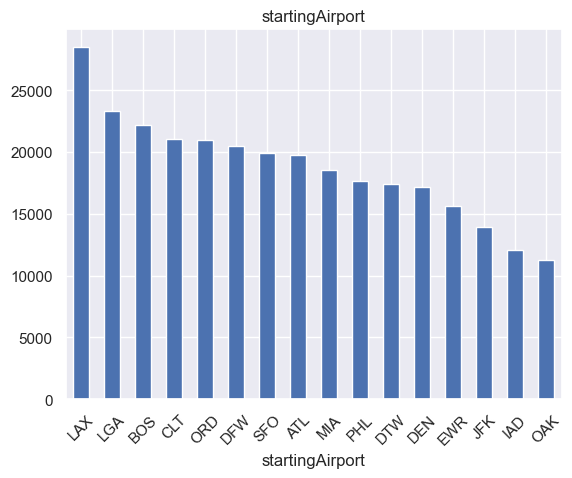

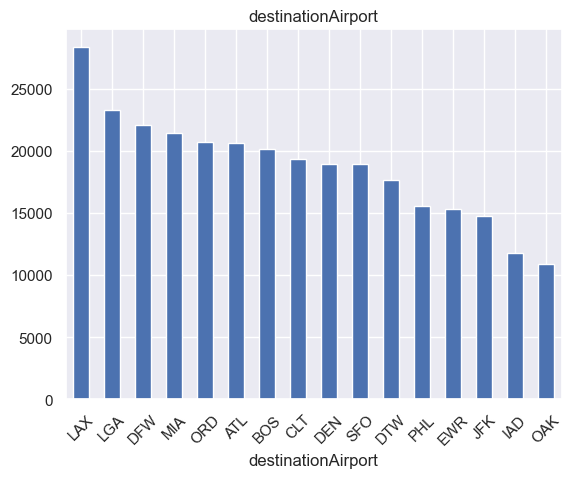

In [11]:
plt.clf()
df['startingAirport'].value_counts().plot(kind='bar')
plt.title('startingAirport')
plt.xticks(rotation=45)
plt.show()

plt.clf()
df['destinationAirport'].value_counts().plot(kind='bar')
plt.title('destinationAirport')
plt.xticks(rotation=45)
plt.show()

Abaixo, podemos observar que a grande maioria dos voos não são de classe econômica e com paradas. E todos não são reembolsaveis.

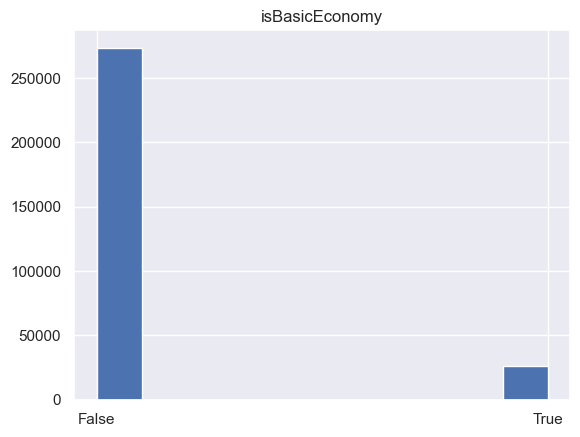

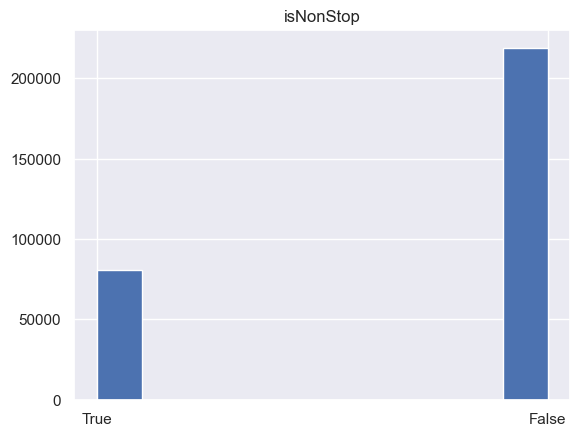

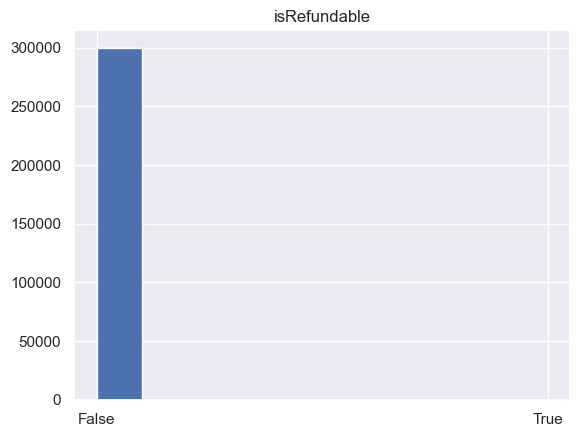

In [12]:
plt.clf()
df['isBasicEconomy'].astype(str).hist()
plt.title('isBasicEconomy')
plt.show()

plt.clf()
df['isNonStop'].astype(str).hist()
plt.title('isNonStop')
plt.show()

plt.clf()
df['isRefundable'].astype(str).hist()
plt.title('isRefundable')
plt.show()

A grande maioria dos voos possuem 7-10 assentos livres.

A maioria está na faixa de até 30.000 segundos (8H30M).

Em relação a distância, temos uma variação dos dados na faixa de 500-1500km e 2500-3000km.

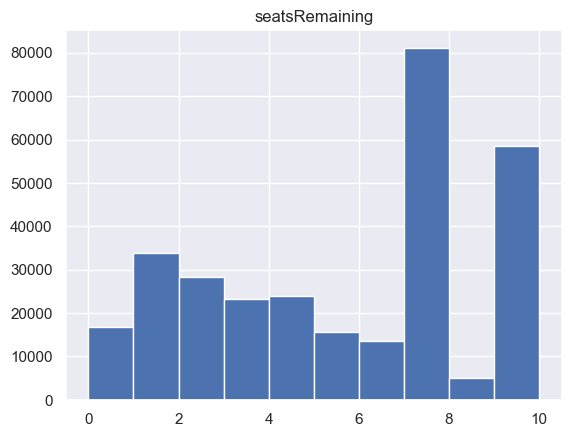

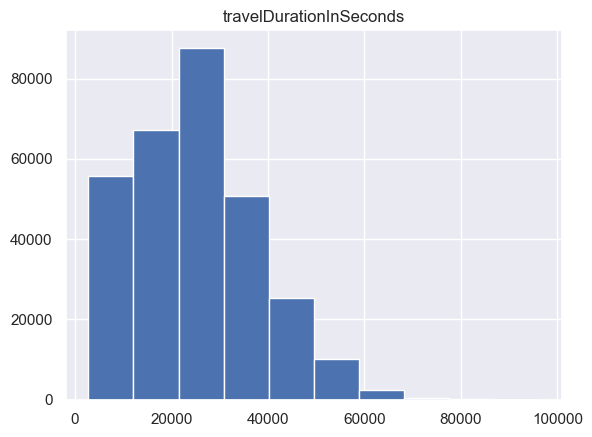

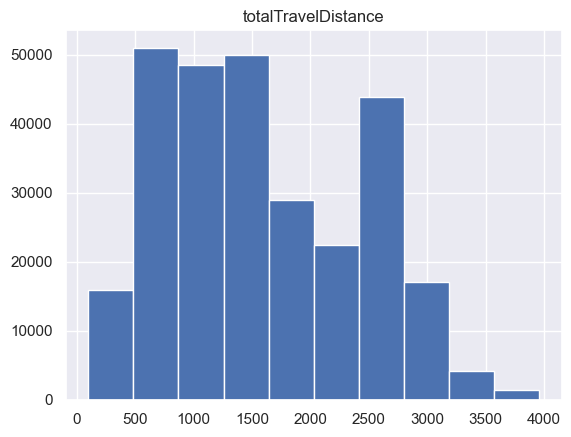

In [13]:

plt.clf()
df['seatsRemaining'].hist()
plt.title('seatsRemaining')
plt.show()

plt.clf()
df['travelDurationInSeconds'].hist()
plt.title('travelDurationInSeconds')
plt.show()

plt.clf()
df['totalTravelDistance'].hist()
plt.title('totalTravelDistance')
plt.show()

Vemos abaixo que a maioria dos voos tem taxas de até $75,00 e preços abaixo de $1.000,00.

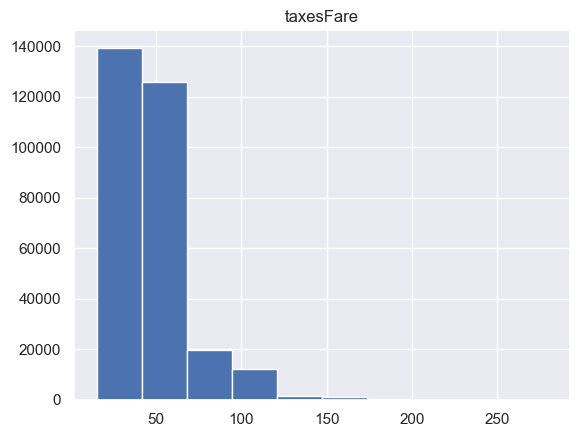

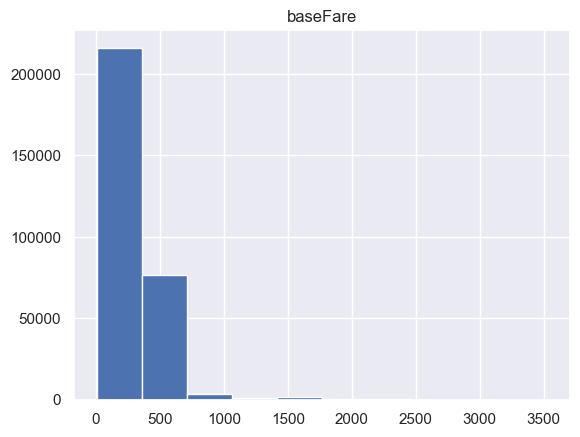

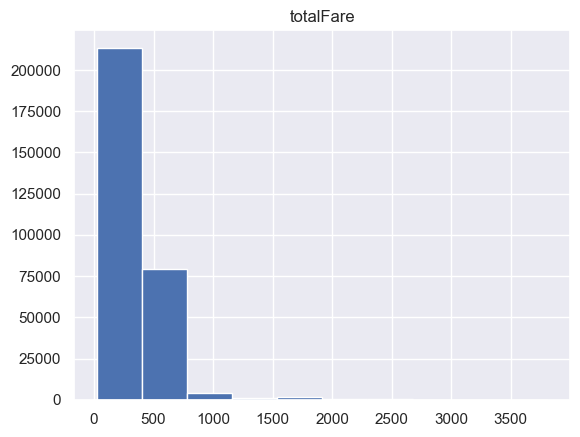

In [14]:
plt.clf()
df['taxesFare'].hist()
plt.title('taxesFare')
plt.show()

plt.clf()
df['baseFare'].hist()
plt.title('baseFare')
plt.show()

plt.clf()
df['totalFare'].hist()
plt.title('totalFare')
plt.show()

## Bivariadas

In [15]:
numeric_cols = df.select_dtypes(include="number").columns

In [16]:
corr = df[numeric_cols].corr()

<Axes: >

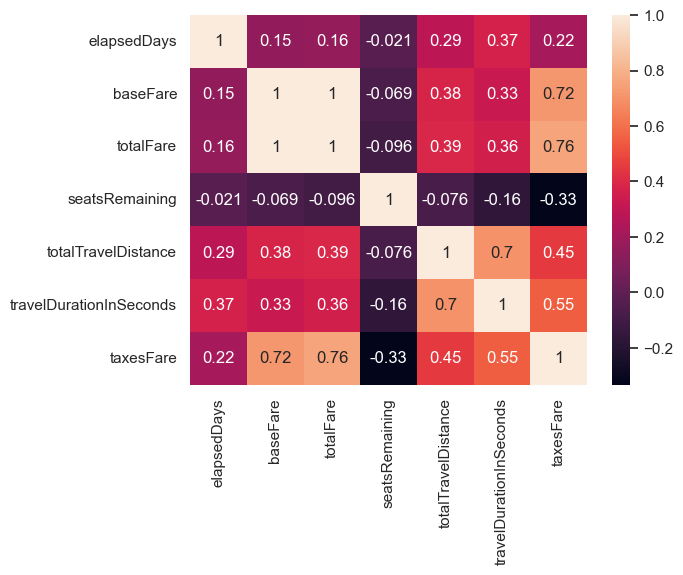

In [17]:
sns.heatmap(corr, annot=True)

## Columas Numéricas

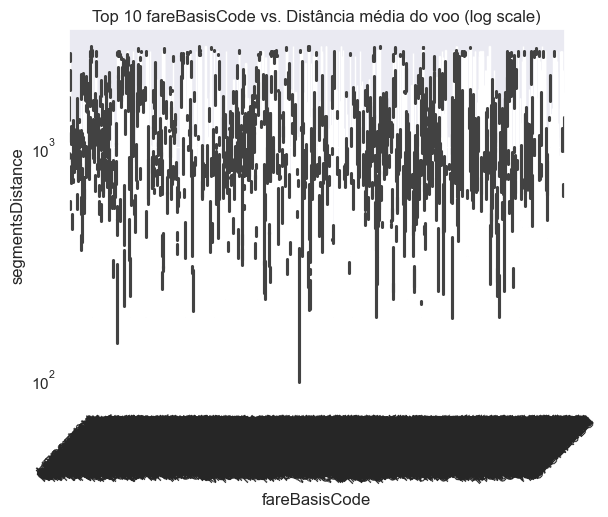

In [28]:
plt.clf()
sns.barplot(data=df, x="fareBasisCode", y="segmentsDistance", estimator="mean")
plt.yscale("log")
plt.xticks(rotation=45)
plt.title("Top 10 fareBasisCode vs. Distância média do voo (log scale)")
plt.show()

In [29]:
df["segmentsDistance"] = pd.to_numeric(df["segmentsDistance"], errors="coerce")

In [30]:
df = df.dropna(subset=["segmentsDistance", "segmentsDurationInSeconds"])

In [31]:
df["distance_bin"] = pd.cut(df["segmentsDistance"], bins=10)

In [32]:
df["segmentsDurationInSeconds"] = pd.to_numeric(df["segmentsDurationInSeconds"], errors="coerce")
df["duration_minutes"] = df["segmentsDurationInSeconds"] / 60

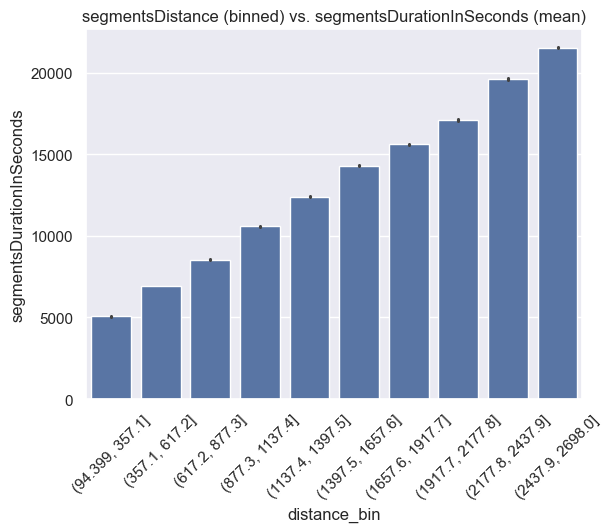

In [33]:
plt.clf()
sns.barplot(data=df, x="distance_bin", y="segmentsDurationInSeconds", estimator="mean")
plt.xticks(rotation=45)
plt.title("segmentsDistance (binned) vs. segmentsDurationInSeconds (mean)")
plt.show()

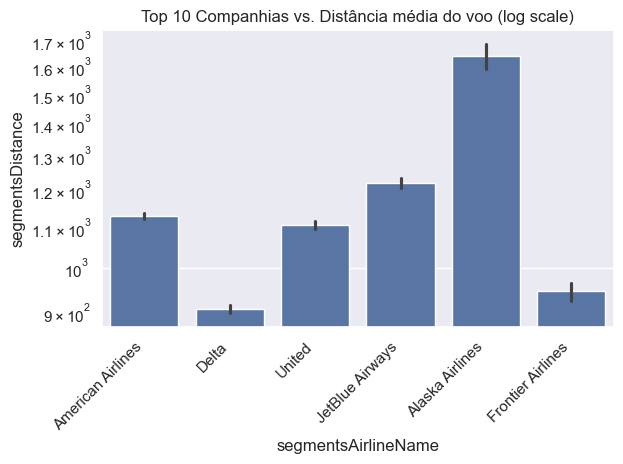

In [34]:
plt.clf()
top_airlines = df['segmentsAirlineName'].value_counts().head(10).index
df_top = df[df['segmentsAirlineName'].isin(top_airlines)]
df_top['segmentsDistance'] = pd.to_numeric(df_top['segmentsDistance'], errors='coerce')

sns.barplot(
    data=df_top,
    x="segmentsAirlineName",
    y="segmentsDistance",
    estimator="mean",
    order=top_airlines
)

plt.yscale("log")
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Companhias vs. Distância média do voo (log scale)")
plt.tight_layout()
plt.show()

In [35]:
#Colunas Categóricas

categoric_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
print(categoric_cols)

['legId', 'searchDate', 'flightDate', 'startingAirport', 'destinationAirport', 'fareBasisCode', 'travelDuration', 'isBasicEconomy', 'isRefundable', 'isNonStop', 'segmentsDepartureTimeEpochSeconds', 'segmentsDepartureTimeRaw', 'segmentsArrivalTimeEpochSeconds', 'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode', 'segmentsDepartureAirportCode', 'segmentsAirlineName', 'segmentsAirlineCode', 'segmentsEquipmentDescription', 'segmentsCabinCode', 'segment1AirlineName', 'segment2AirlineName', 'segment3AirlineName', 'segment4AirlineName', 'segment1CabinCode', 'segment2CabinCode', 'segment3CabinCode', 'segment4CabinCode', 'baseFare_cat', 'seatsRemaining_cat', 'totalTravelDistance_cat', 'travelDurationInSeconds_cat', 'taxesFare_cat', 'distance_bin']


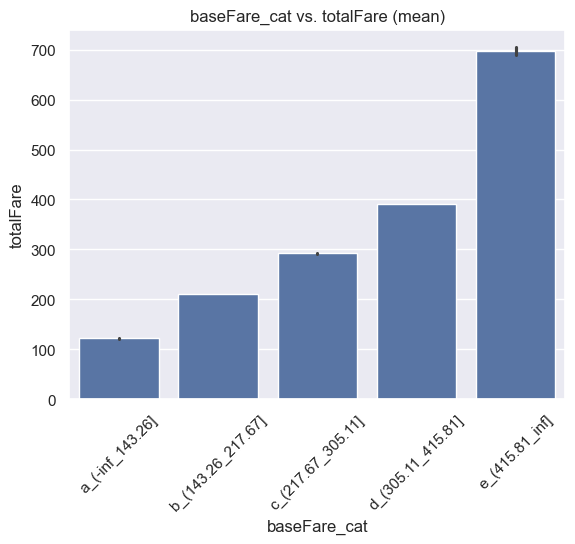

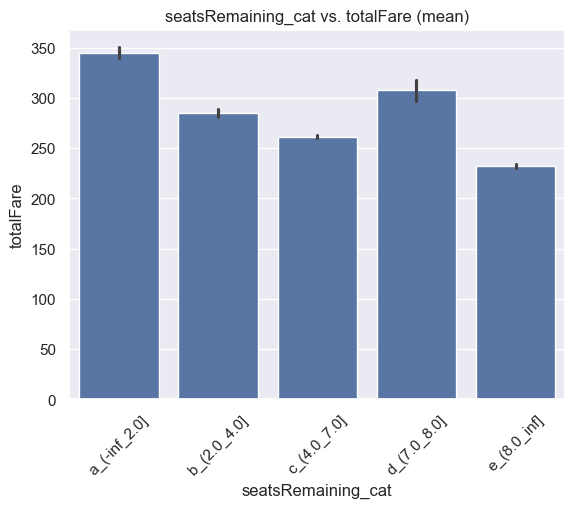

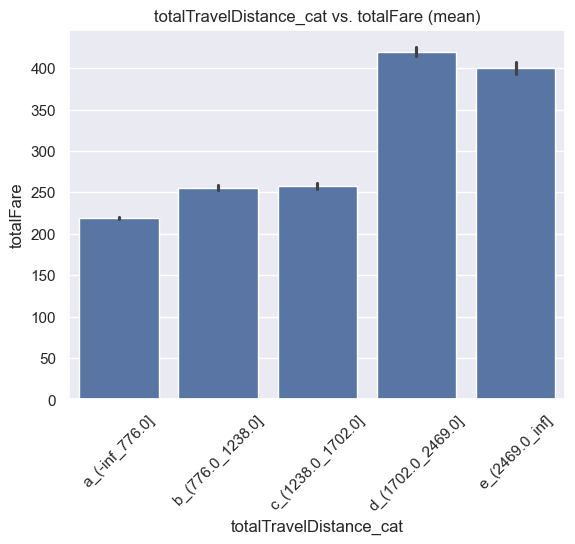

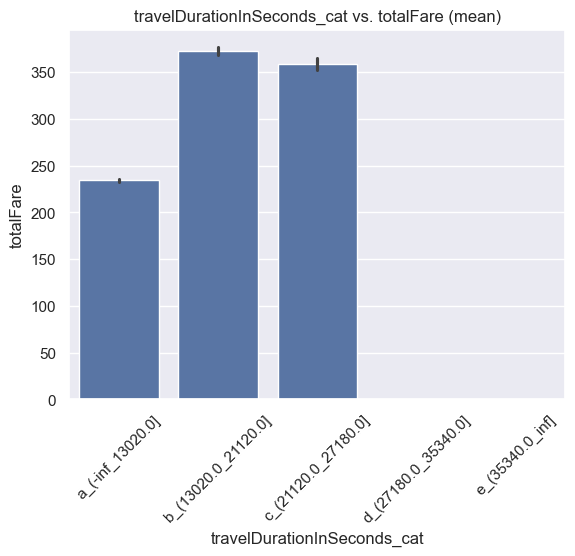

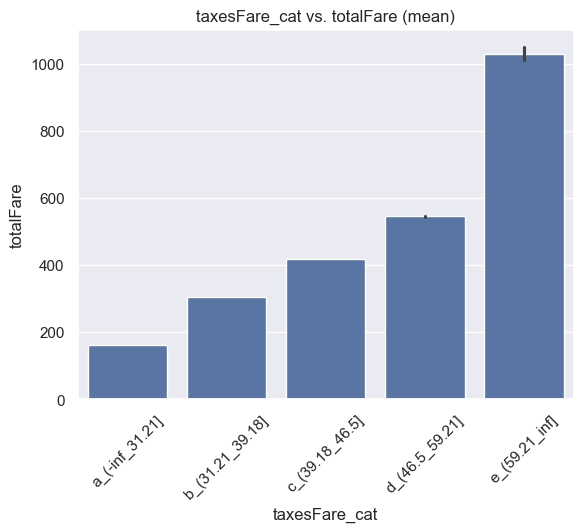

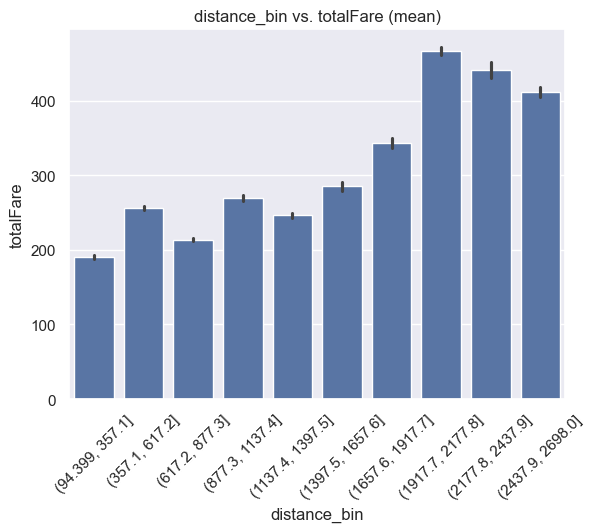

In [36]:
for col in ['baseFare_cat', 'seatsRemaining_cat', 'totalTravelDistance_cat', 'travelDurationInSeconds_cat', 'taxesFare_cat', 'distance_bin']:
    plt.clf()
    sns.barplot(data=df, x=col, y=TARGET, estimator='mean')
    plt.xticks(rotation=45)
    plt.title(f"{col} vs. {TARGET} (mean)")
    plt.show()

## Multivariadas

In [37]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,fareBasisCode,travelDuration,elapsedDays,isBasicEconomy,isRefundable,...,segment2CabinCode,segment3CabinCode,segment4CabinCode,baseFare_cat,seatsRemaining_cat,totalTravelDistance_cat,travelDurationInSeconds_cat,taxesFare_cat,distance_bin,duration_minutes
0,9ca0e81111c683bec1012473feefd28f,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H29M,0,False,False,...,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21],"(877.3, 1137.4]",149.0
1,98685953630e772a098941b71906592b,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,NaN,NaN,NaN,b_(143.26_217.67],b_(2.0_4.0],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21],"(877.3, 1137.4]",150.0
2,98d90cbc32bfbb05c2fc32897c7c1087,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H30M,0,False,False,...,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21],"(877.3, 1137.4]",150.0
3,969a269d38eae583f455486fa90877b4,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H32M,0,False,False,...,NaN,NaN,NaN,b_(143.26_217.67],d_(7.0_8.0],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21],"(877.3, 1137.4]",152.0
4,980370cf27c89b40d2833a1d5afc9751,2022-04-16,2022-04-17,ATL,BOS,LA0NX0MC,PT2H34M,0,False,False,...,NaN,NaN,NaN,b_(143.26_217.67],e_(8.0_inf],b_(776.0_1238.0],a_(-inf_13020.0],a_(-inf_31.21],"(877.3, 1137.4]",154.0


In [38]:
df.dtypes

legId                                  object
searchDate                             object
flightDate                             object
startingAirport                        object
destinationAirport                     object
fareBasisCode                          object
travelDuration                         object
elapsedDays                             int64
isBasicEconomy                           bool
isRefundable                             bool
isNonStop                                bool
baseFare                              float64
totalFare                             float64
seatsRemaining                          int64
totalTravelDistance                   float64
segmentsDepartureTimeEpochSeconds      object
segmentsDepartureTimeRaw               object
segmentsArrivalTimeEpochSeconds        object
segmentsArrivalTimeRaw                 object
segmentsArrivalAirportCode             object
segmentsDepartureAirportCode           object
segmentsAirlineName               

Abaixo temos um comparativo do preço total da passagem por destino. Podemos observar que os destinos que possuem maior preço são, LAX (Los Angeles), JFK (Nova York), EWR (Nova Jersey), BOS (Boston) e SFO (São Francisco).

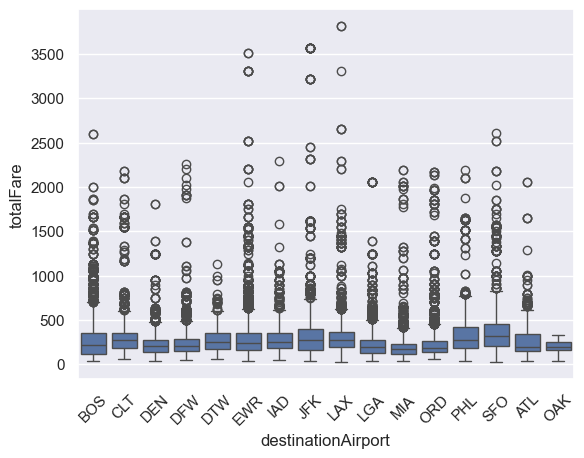

In [39]:
sns.boxplot(x='destinationAirport', y='totalFare', data=df)
plt.xticks(rotation=45)
plt.show()

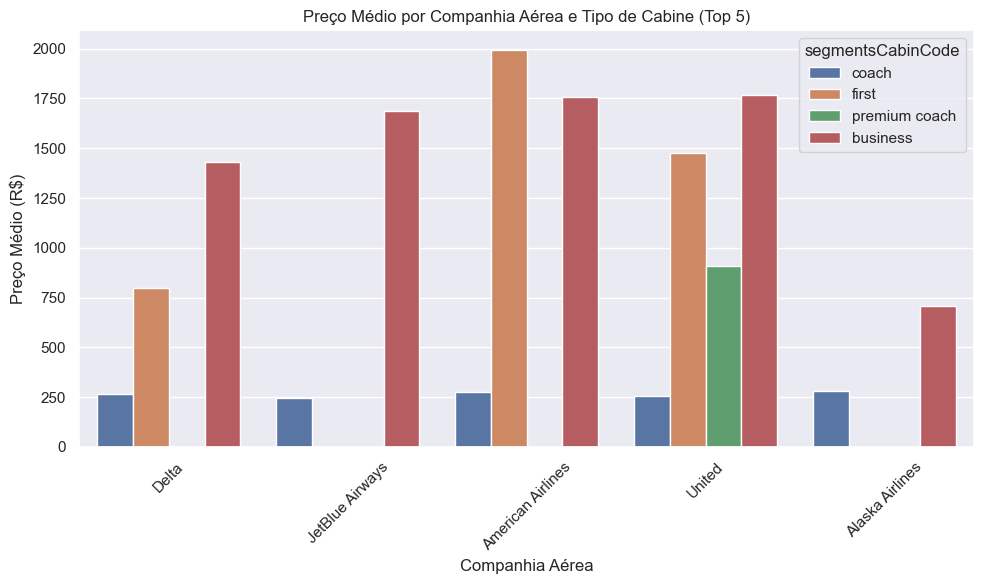

In [40]:
companhias_mais_frequentes = df["segmentsAirlineName"].value_counts().nlargest(5).index
df_limpo = df[df["segmentsAirlineName"].isin(companhias_mais_frequentes)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x="segmentsAirlineName", y="totalFare", hue="segmentsCabinCode", errorbar=None)
plt.title("Preço Médio por Companhia Aérea e Tipo de Cabine (Top 5)")
plt.xlabel("Companhia Aérea")
plt.ylabel("Preço Médio (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Esse gráfico de barras mostra o preço médio das passagens para as 5 companhias aéreas mais frequentes no conjunto de dados, dividido por tipo de cabine (ex: econômica, executiva).

O que você pode observar:

Como os preços variam entre as companhias. Diferenças significativas entre cabines

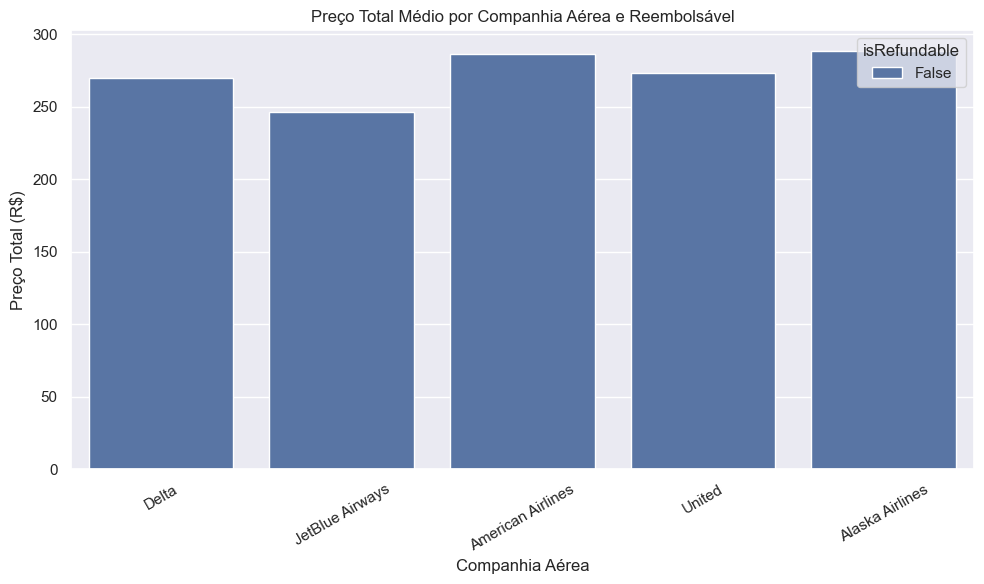

In [41]:
top_companhias = df["segmentsAirlineName"].value_counts().nlargest(5).index
df_limpo = df[df["segmentsAirlineName"].isin(top_companhias)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_limpo, x="segmentsAirlineName", y="totalFare", hue="isRefundable", errorbar=None)
plt.title("Preço Total Médio por Companhia Aérea e Reembolsável")
plt.xlabel("Companhia Aérea")
plt.ylabel("Preço Total (R$)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

Similar ao anterior, mas agora segmentado por passagens reembolsáveis ou não.

O que você pode observar:

Voos reembolsáveis tendem a ser mais caros. Algumas companhias podem ter políticas de preço bem distintas para esse tipo de passagem.

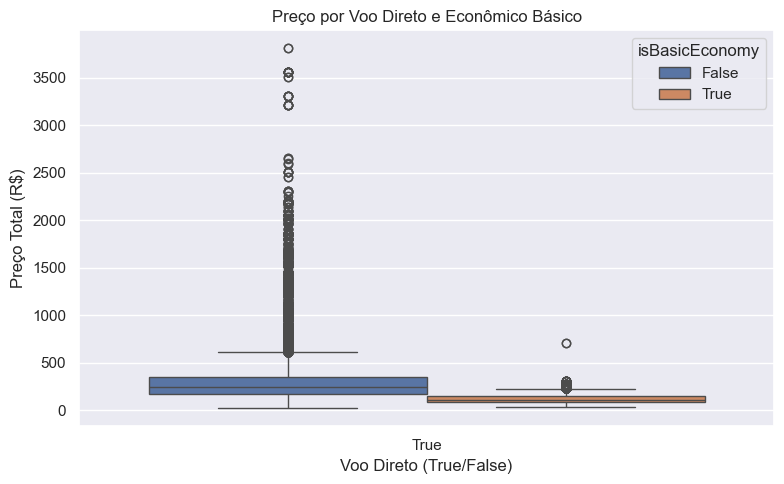

In [42]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="isNonStop", y="totalFare", hue="isBasicEconomy")
plt.title("Preço por Voo Direto e Econômico Básico")
plt.xlabel("Voo Direto (True/False)")
plt.ylabel("Preço Total (R$)")
plt.tight_layout()
plt.show()

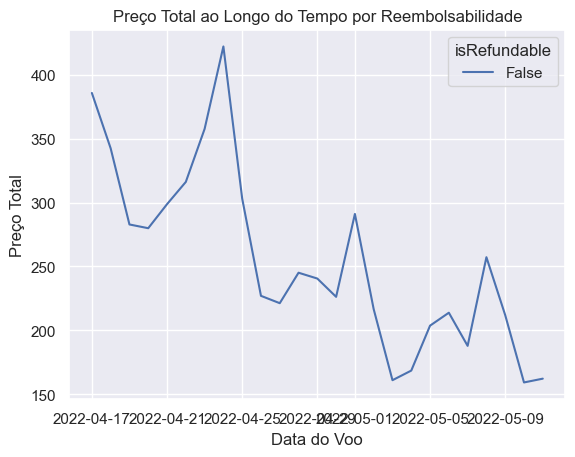

In [43]:
df['flightDate'] = pd.to_datetime(df['flightDate'])

sns.lineplot(data=df, x="flightDate", y="totalFare", hue="isRefundable", errorbar=None)
plt.title("Preço Total ao Longo do Tempo por Reembolsabilidade")
plt.xlabel("Data do Voo")
plt.ylabel("Preço Total")
plt.show()

Gráfico de linha mostrando a evolução do preço das passagens ao longo do tempo, comparando voos reembolsáveis e não reembolsáveis.

O que você pode observar:

Tendências de alta ou baixa nos preços. Diferença média entre reembolsáveis e não-reembolsáveis em diferentes períodos.

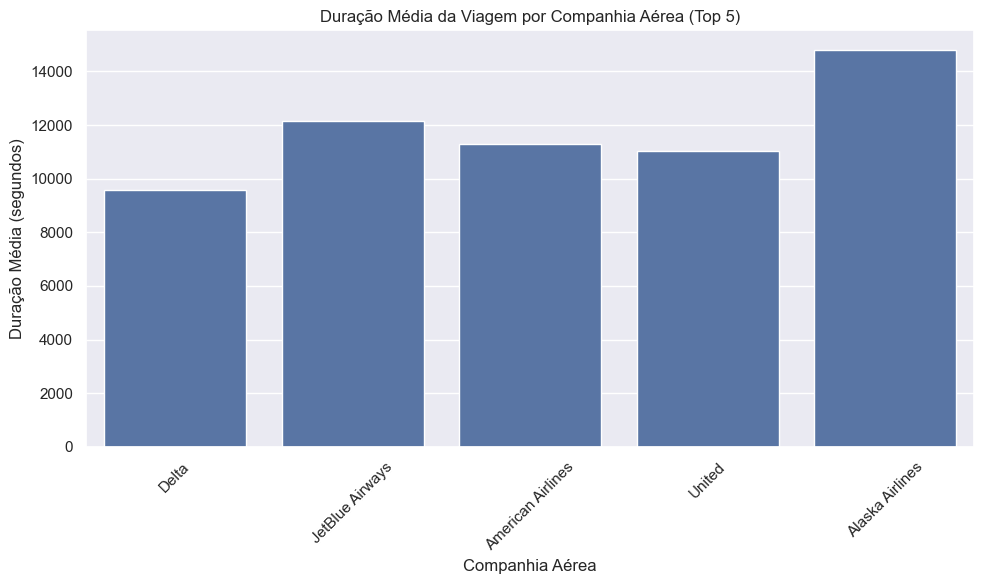

In [44]:
companhias_top5 = df["segmentsAirlineName"].value_counts().nlargest(5).index
df_top5 = df[df["segmentsAirlineName"].isin(companhias_top5)]

plt.figure(figsize=(10, 6))
sns.barplot(data=df_top5, x="segmentsAirlineName", y="travelDurationInSeconds", errorbar=None)
plt.title("Duração Média da Viagem por Companhia Aérea (Top 5)")
plt.xlabel("Companhia Aérea")
plt.ylabel("Duração Média (segundos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar a média de duração das viagens (em segundos) para as companhias mais frequentes.

O que você pode observar:

Companhias que geralmente operam voos mais longos ou curtos. Indícios do tipo de rota que cada companhia opera (doméstica vs internacional, por exemplo).

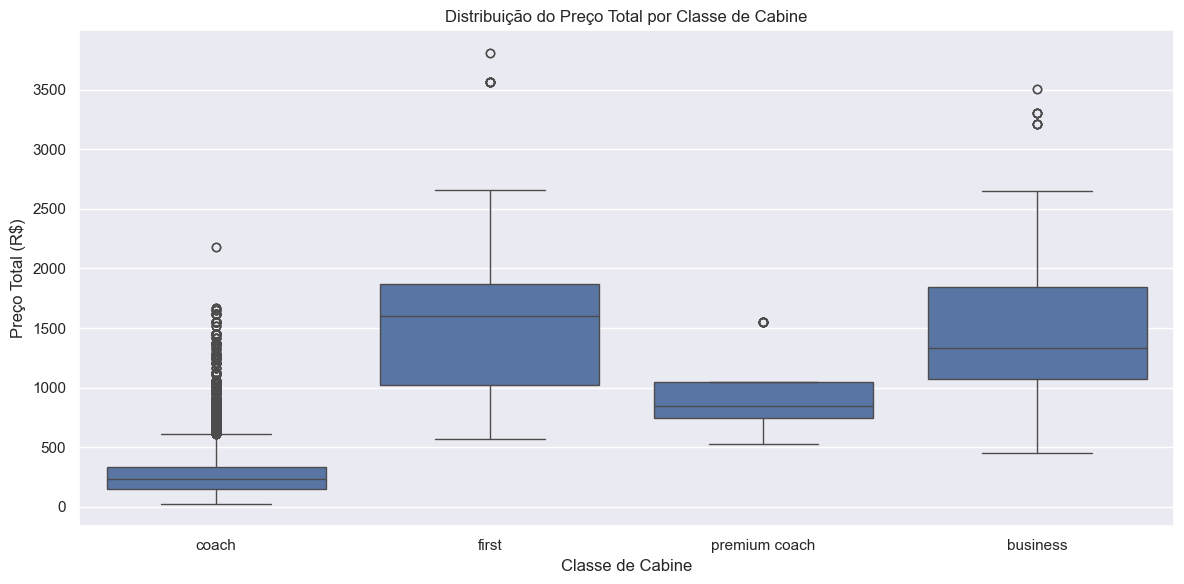

In [45]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="segmentsCabinCode", y="totalFare")
plt.title("Distribuição do Preço Total por Classe de Cabine")
plt.xlabel("Classe de Cabine")
plt.ylabel("Preço Total (R$)")
plt.tight_layout()
plt.show()

Boxplot comparando a variação dos preços para diferentes classes de cabine.

O que você pode observar:

A faixa de preço de cada cabine. Presença de outliers (preços muito acima ou abaixo da média). Dispersão dos valores dentro de cada categoria.

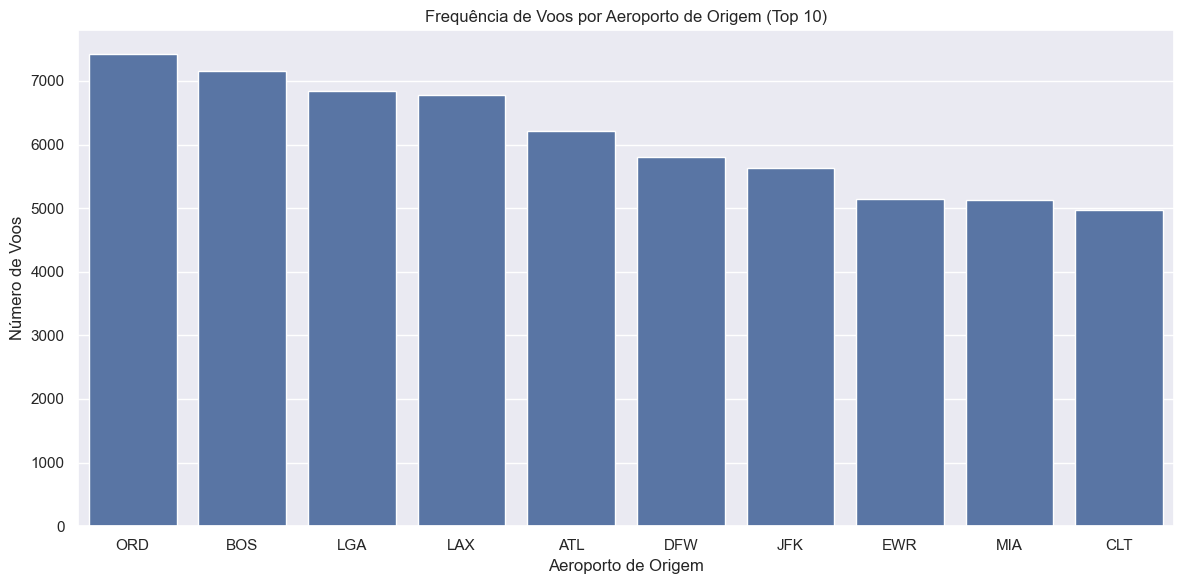

In [46]:
plt.figure(figsize=(12, 6))
top_aeroportos = df["startingAirport"].value_counts().nlargest(10)
sns.barplot(x=top_aeroportos.index, y=top_aeroportos.values)
plt.title("Frequência de Voos por Aeroporto de Origem (Top 10)")
plt.xlabel("Aeroporto de Origem")
plt.ylabel("Número de Voos")
plt.tight_layout()
plt.show()

Os 10 aeroportos de origem mais frequentes no dataset.

O que você pode observar:

Quais aeroportos são hubs principais no conjunto de dados. Potenciais regiões de maior tráfego aéreo.

C:\Users\Luiz\AppData\Local\Temp\ipykernel_1240\4207127821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_atl_bos["flightDate"] = pd.to_datetime(df_atl_bos["flightDate"])


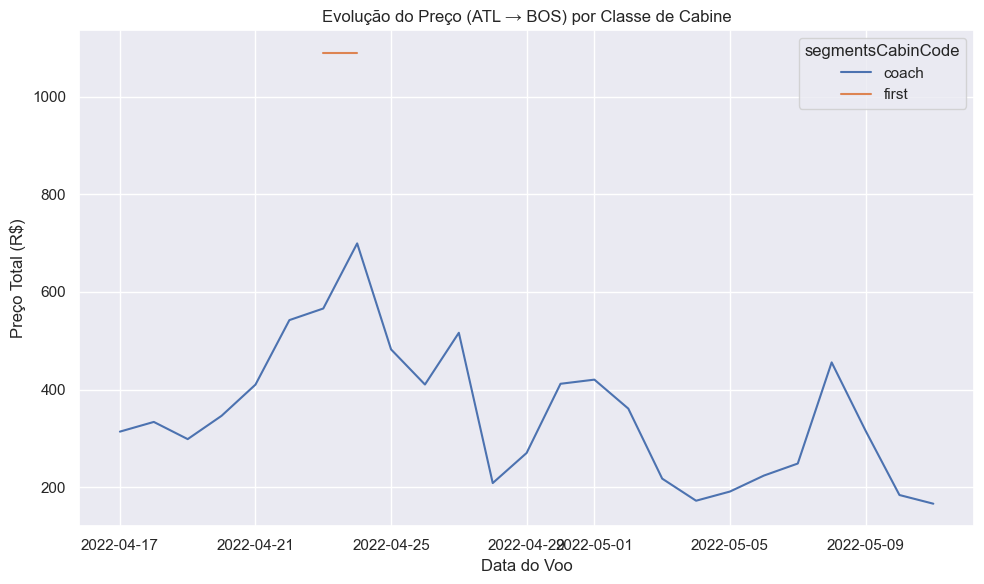

In [47]:
df_atl_bos = df[(df["startingAirport"] == "ATL") & (df["destinationAirport"] == "BOS")]
df_atl_bos["flightDate"] = pd.to_datetime(df_atl_bos["flightDate"])

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_atl_bos, x="flightDate", y="totalFare", hue="segmentsCabinCode", errorbar=None)
plt.title("Evolução do Preço (ATL → BOS) por Classe de Cabine")
plt.xlabel("Data do Voo")
plt.ylabel("Preço Total (R$)")
plt.tight_layout()
plt.show()

Gráfico de linha para uma rota específica (Atlanta para Boston), separado por classe de cabine.

O que você pode observar:

Como os preços variam ao longo do tempo nessa rota. Diferença de comportamento entre cabines.

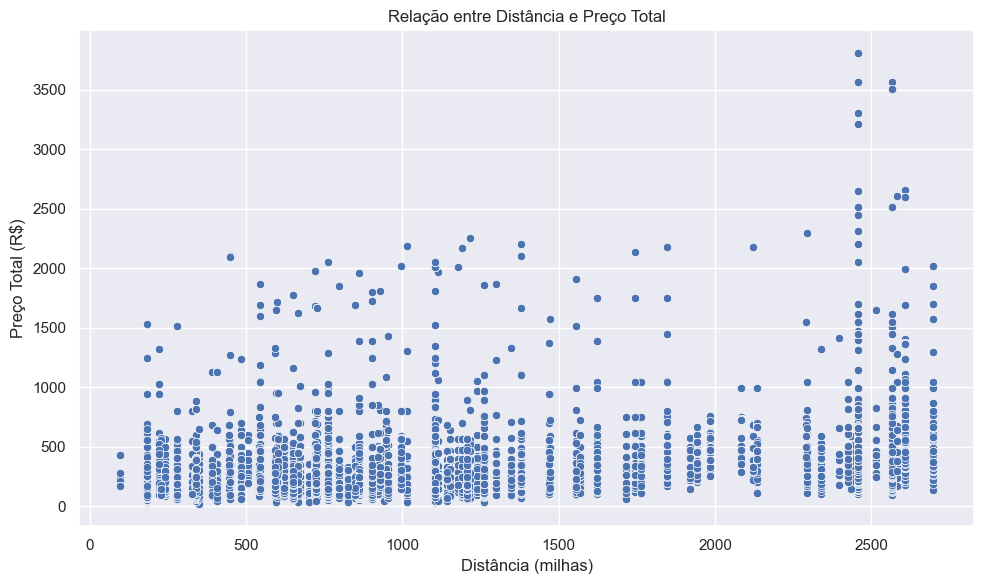

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="segmentsDistance", y="totalFare")
plt.title("Relação entre Distância e Preço Total")
plt.xlabel("Distância (milhas)")
plt.ylabel("Preço Total (R$)")
plt.tight_layout()
plt.show()

Gráfico de dispersão com os 100 voos mais caros, mostrando a relação entre a distância do voo e o preço da passagem.

O que você pode observar:

Tendência geral: voos mais longos geralmente custam mais, mas não sempre. Possíveis exceções como voos curtos muito caros (talvez por cabine premium ou reembolsabilidade). Diferenças por companhia ou cabine.

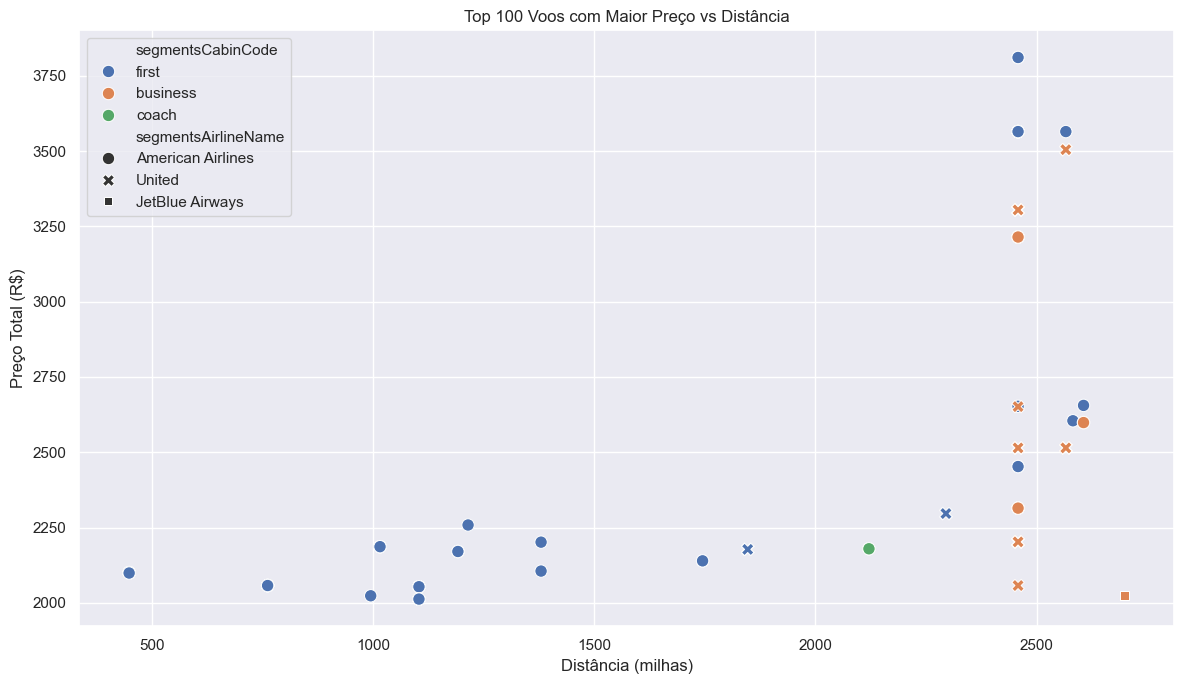

In [49]:
df_top100 = df.sort_values(by="totalFare", ascending=False).head(100)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_top100, x="segmentsDistance", y="totalFare", hue="segmentsCabinCode", style="segmentsAirlineName", s=80)
plt.title("Top 100 Voos com Maior Preço vs Distância")
plt.xlabel("Distância (milhas)")
plt.ylabel("Preço Total (R$)")
plt.tight_layout()
plt.show()

Este gráfico apresenta os 100 voos com os maiores preços no conjunto de dados, comparando o preço total com a distância do voo.

O que você pode observar:

Alguns voos curtos aparecem com preços muito altos, indicando que o tipo de cabine (ex: executiva ou primeira classe) tem grande influência. Companhias diferentes também aparecem com padrões variados de preço, mesmo para distâncias semelhantes.

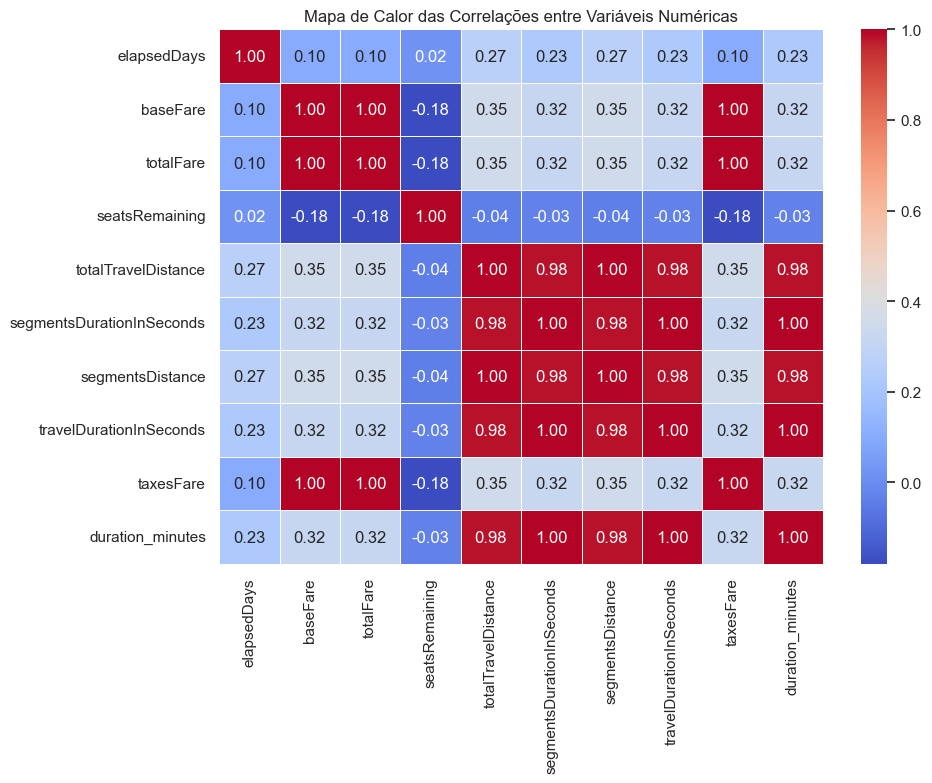

In [50]:
df_numerico = df.select_dtypes(include=[np.number])

correlacao = df_numerico.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis Numéricas")
plt.tight_layout()
plt.show()